## <center> DECISION TREE</center>

### NOTE: do not use the following columns in th excercize as they do not bear any relation to the result :

1. 'PassangerId'
2. 'Name'
3. 'SibSp'
4. 'Parch'
5. 'Ticket'
6. 'Cabin'
7. 'Embarked'

In [81]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [82]:
%matplotlib inline

In [83]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### DROP THE UNNECESSARY COLUMNS FROM THE DATAFRAME

In [84]:
df.drop(columns=['PassengerId','Name','Parch','SibSp','Ticket','Cabin','Embarked'],inplace=True)
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


## EXPLORATORY DATA ANALYSIS

In [85]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [86]:
# REGULARIZE THE DATA COLUMN 'Age' BY REPLACING THE NULL ELEMENTS WITH MEAN VALUES

In [87]:
import math 

avg_age = math.floor(np.mean(df.Age))

df.fillna(avg_age,inplace=True)

Text(0, 0.5, 'Count')

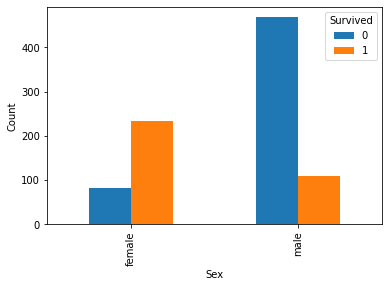

In [88]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

plt.ylabel('Count')

<AxesSubplot:xlabel='Pclass'>

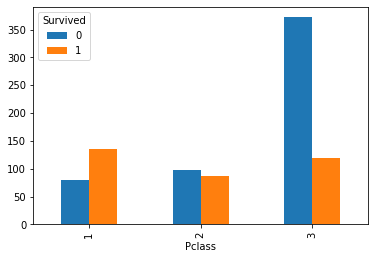

In [89]:
pd.crosstab(df.Pclass,df.Survived).plot.bar()

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

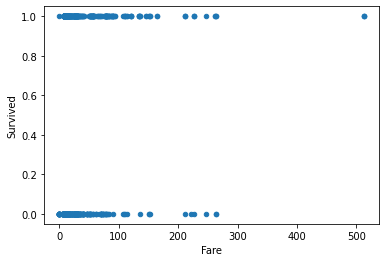

In [90]:
df.plot.scatter(x='Fare',y='Survived')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

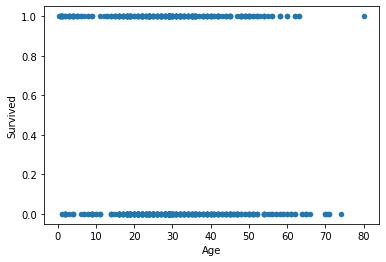

In [91]:
df.plot.scatter(x='Age',y='Survived')

In [92]:
# NO. OF VICTIMS WHO WERE MALE
len(df[(df.Survived==0) & (df.Sex=='male')])

468

In [93]:
df.groupby(['Survived']).mean()

,Pclass,Age,Fare
Survived,,,
0,2.531876,30.25592,22.117887
1,1.950292,28.44348,48.395408


### POST ANALYSIS CONCLUSION:

* THE PASSANGER CLASS OF SURVIVORS WAS LOW (EMBARKED = B CLASS, C CLASS)
* THE AVERAGE AGE OF THE SURVIVORS IS ALSO LOWER
* THE FARE OF SURVIVORS IS DRASTICALLY HIGHER IN COMPARISON

**NOTE: IN THE ACTUAL SCENARIO THE SURVIVORS WERE MAJORLY OF S CLASS**

### DO ENCODING FOR THE GENDER OF PASSANGERS

In [94]:
le_gender = LabelEncoder()

In [95]:
df['sex_p'] = le_gender.fit_transform(df.Sex)
# 0 for female
# 1 for male
df.head()

,Survived,Pclass,Sex,Age,Fare,sex_p
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [96]:
df.drop(columns=['Sex'],inplace=True)
df.head()

,Survived,Pclass,Age,Fare,sex_p
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


## SPLIT DATA INTO TRAINING AND TESTING DATAFRAMES

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df[['Pclass','Age','Fare','sex_p']],df.Survived,test_size=0.2)

## TRAIN MODEL DECISION TREE

In [98]:
model = tree.DecisionTreeClassifier()

**<u>FEED DATA TO THE MODEL</u>**

In [99]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [101]:
model.score(X_test,y_test)

0.7932960893854749

In [102]:
# plot confusion matrix

import seaborn as sn

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[93, 24],
       [13, 49]], dtype=int64)

Text(33.0, 0.5, 'ACTUAL SURVIVAL')

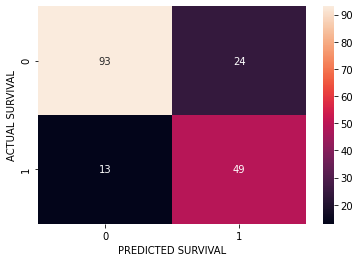

In [103]:
sn.heatmap(cm,annot=True)

plt.xlabel('PREDICTED SURVIVAL')
plt.ylabel("ACTUAL SURVIVAL")